<a href="https://colab.research.google.com/github/Nisha40108/ADVANCED-MACHINE-LEARNING-64061-/blob/main/Assignment2CON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5"><b>Assignment 2 - Deep Convolutional Neural Network - Cats vs Dogs</b></font>

<font size="5"><b>Name : Nisha Chaurasia</b></font>

<font size="5"><b>Date : 10-22-2023 </b></font>

<font size="3">Loading all the required libraries and functions</font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

<font size="3"> Importing the JSON Activation Code</font>

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vini09","key":"366b6dda6f517e24aec2460856a9b32a"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Downloading the Data

In [6]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:05<00:00, 104MB/s]
100% 812M/812M [00:05<00:00, 151MB/s]


Unzipping the Data

In [7]:
!unzip -qq dogs-vs-cats.zip

Unzipping Train Data

In [8]:
!unzip -qq train.zip

In [16]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1

<font size="4.5"><b> 1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve? </b></font>

<font size="3"> Creating directory named cats vs dogs small to store the images into 3 subsets named train, validation and test and Dividing the training sample of 1000, a validation sample of 500, and a test sample of 500</font>

In [20]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

FileExistsError: ignored

<font size="3"><u>Data Pre-Processing and functions</u> - Using image_dataset_from_directory to read images and functions</font>

In [19]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


<font size="3">Viewing the shape of the images</font>

In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<font size="3"><b> Model - 1 MaxPooling Operation with Increase in filters from <u>32 to 256</u> in <u>5 Input Layers</u></b> : Instantiating a small convnet for dogs vs. cats classification </font>

In [12]:
#Building the model
#Instantiating a small convnet for dogs vs. cats classification
#*Model - 1 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers*

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

<font size="3"> Summary of Model - 1 </font>

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

<font size="3"> Training the model 1 </font>

In [14]:
# Compilimg the results of the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5160

ValueError: ignored

<font size="3"> Looking at the visuals of the Training and Validation Accuracy/Loss</font>

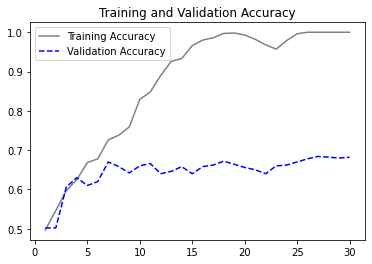

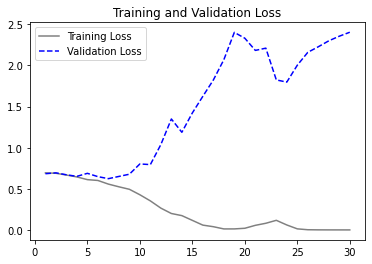

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3"> Evaluating the performance of Model_1 on test set</font>

In [ ]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

16/16 [==============================] - 5s 300ms/step - loss: 0.6718 - accuracy: 0.6660
Loss: 0.672
Accuracy: 0.666


<font size="3"><b> Using Measures to Avoid Overfitting</b></font>

<font size="3"><u>Data Augmentation<u></font>

In [ ]:
# To deprecate warnings that are making the output look clumsy
import logging
logging.getLogger('tensorflow').disabled = True

<font size="3"> Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image</font>

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

<font size="3">Looking at the augmented images</font>

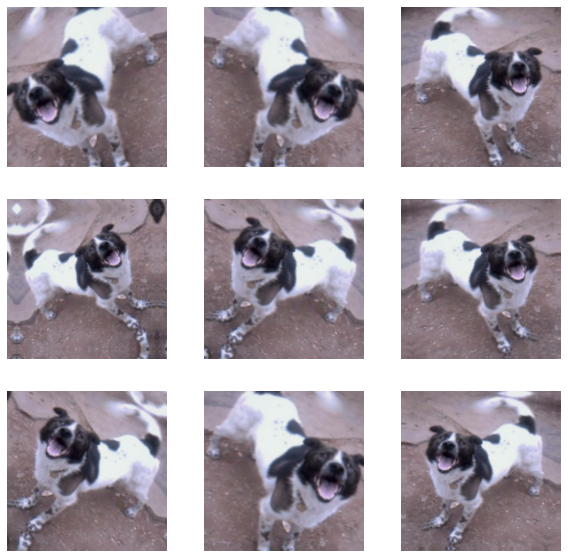

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

<font size="3"><b> Model - 2 MaxPooling Operation with Increase in filters from <u>32 to 256</u> in <u>5 Input Layers</u> with the data being used from the <u>Augmented Images</u> and a <u>droput rate of 0.5</u>*</b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

<font size="3">Training the model 2</font>

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Fitting/Running the Model
Model_2 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 46s 1s/step - loss: 0.7047 - accuracy: 0.5190 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 45s 1s/step - loss: 0.6901 - accuracy: 0.5520 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 45s 1s/step - loss: 0.7006 - accuracy: 0.4840 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 45s 1s/step - loss: 0.6938 - accuracy: 0.5110 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 45s 1s/step - loss: 0.6934 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/30
32/32 [==============================] - 45s 1s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
32/32 [==============================] - 45s 1s/step - loss: 0.6939 - accuracy: 0.5110 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 8/30
32/32 [==

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

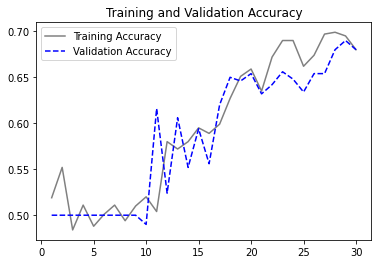

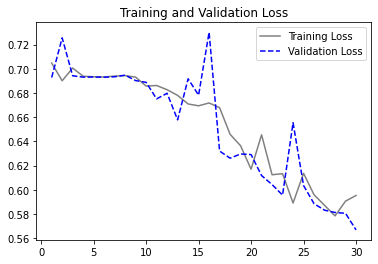

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

16/16 [==============================] - 5s 300ms/step - loss: 0.5941 - accuracy: 0.6920
Loss: 0.594
Accuracy: 0.692


<font size="3"><b>Comparing the Model 1 and Model 2</b> : we can clearly see that the accuracy rate of model 2 is increased by 10</font>

<font size="3"><b>Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in <u>6 Input Layers</u> with the use of <u>Augmented Images</u> and <u>Dropout rate of 0.5</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0   

<font size="3">Training the model 3</font>

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

NameError: name 'model' is not defined

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

<font size="3"><b>Model - 4 MaxPooling Operation with Increase in filters from <u>64 to 1024</u> in <u>5 Input Layers</u> with the use of <u>Augmented Images</u> and <u>Dropout rate of 0.6</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
<font size="3">Evaluating the performance of Model_2 on the test set</font>

In [ ]:
best_model = keras.models.load_model("model4.keras")
Model4_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

<font size="3"><b>Summary for Question 1</b>: We did try to build 4 models with the training sample being 1000. Now lets compare the loss and Accuracy of all the 4 models to see which model gives better result</font>

<font size="3"><b>Model 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>Model 3:</b> filters from 32 to 512, 6 Input Layers, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>Model 4:</b> filters from 64 to 1024, 5 Input Layers, Augmented Images and Dropout rate of 0.6 </font>

In [ ]:
Model_1 = (0.645, 0.614)
Model_2 = (0.601, 0.712)
Model_3 = (0.609,0.692)
Model_4 = (0.666, 0.652)

In [ ]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss,Accuracy)
for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i],Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="3"><b> Conclusions:</b> From the above graph we can conclude that model 2 is the best amoung all with higher accuracy and minimum loss, however model model 4 has the highest loss </font>

<font size="3"><b> Recommendation:</b> As we can see model 2 is performing best amoung all 4 models hence we should choose model with filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5  </font>

*<font size="4.5"><b> 2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve? </b></font>*

<font size="3"><b>Considering Training Sample - 2000 </b></font>

In [ ]:
#Define the existing directories
original_dir_path = "/users/PGS0322/nchauras/AML_Data/train"
base_dir_path = "/users/PGS0322/nchauras/AML_Data/Data_Distribution"

#Convert the directory paths to pathlib.Path objects
original_dir = pathlib.Path(original_dir_path)
new_base_dir = pathlib.Path(base_dir_path)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Add the exist_ok parameter
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = original_dir / fname
            if src_file.is_file():
                shutil.copyfile(src=src_file, dst=dir / fname)
            else:
                print(f"File {fname} does not exist in the original directory.")

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
<font size="3"><b>Data Pre-Processing: </b> Using image_dataset_from_directory to read images</font>

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

<font size="3">Viewing the size of the images</font>

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

<font size="3"><font size="3">Viewing the size of the images</font></font>

In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

<font size="3"><b>Model - 5 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 2000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

<font size="3">Training the model 5</font>

In [ ]:

# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

<font size="3">Visualizing the Training and Validation Accuracy/Loss 2</font>

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_5 on test set</font>

In [ ]:
best_model = keras.models.load_model("model5.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

<font size="3"> <b>Summary :</b> The second model built just with 1000 training samples resulted in 71% accuracy whereas the same model with an further increase in training samples to 2000 spiked the accuracy to 86% i.e. 15% increase in the accuracy.</font>

<font size="3"><b>Model - 6 Strides Operation with <u>Padding being "Same"</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 2000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

<font size="3">Training the model 6</font>

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

<font size="3">Visualizing the Training and Validation Accuracy/Loss</font>

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluating the performance of Model_6 on test set</font>

In [ ]:
best_model = keras.models.load_model("model6.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

<font size="3"><b>Summary for Question 2</b>: We did try to build 2 more models with training sample being 2000. Now lets compare the loss and Accuracy of 3 models to see which model gives better result</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, training size 1000</font>

<font size="3"><b>Model 5:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u></font>

<font size="3"><b>Model 6:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u>, <u>Padding being same</u> </font>

In [ ]:
Model_5 = (0.445,0.860)
Model_6 = (0.608,0.650)

In [ ]:
Models_2 = ("Mod_2","Mod_5","Mod_6")
Loss_2 = (Model_2[0],Model_5[0],Model_6[0])
Accuracy_2 = (Model_2[1],Model_5[1],Model_6[1])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss_2,Accuracy_2)
for i, txt in enumerate(Models_2):
    ax.annotate(txt, (Loss_2[i],Accuracy_2[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

*Using Strides with Padding turned on didn't provide much of a benefit to the model, here we can see that the accuracy decreased by 21% when compared to Model 5 which was built using the Max Pooling Layer.

*By optimizing the network and increasing the training sample from 1000 to 2000 we saw an increase in accuracy to 86%.

*To answer the second question we let's plot Model 5 and Model 6 to see which model is the best.

*We can clearly understand from the above graphs that Model_5 is having highest accuracy amongst the models built so far i.e 86% and the least loss of 44.5%. Increasing the training sample to 2000 and providing different augmented images proved to be useful in increasing the performance of the model.*

*<font size="4.5"><b> 3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results </b></font>*

<font size="3"> As we saw in above graph that with the increase in training sample size the Accuracy is also increasing hence will <b>increase the sample size to 3000 and 5000</u> for better performance </font>

<font size="3"><b> Training Sample 3000</b> </font>

In [ ]:
#Define the existing directories
original_dir_path = "/users/PGS0322/nchauras/AML_Data/train"
base_dir_path = "/users/PGS0322/nchauras/AML_Data/Data_Distribution"

#Convert the directory paths to pathlib.Path objects
original_dir = pathlib.Path(original_dir_path)
new_base_dir = pathlib.Path(base_dir_path)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Add the exist_ok parameter
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = original_dir / fname
            if src_file.is_file():
                shutil.copyfile(src=src_file, dst=dir / fname)
            else:
                print(f"File {fname} does not exist in the original directory.")

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

<font size="3"> Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image</font>

In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)


<font size="3"><b>Model - 7 <u>MaxPooling Operation</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model7.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model7.keras")
Model7_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

<font size="3">In the previous Model 6, we attempted to replace the conventional max pooling operation with strides, but the results were not as promising as expected. and in model 7 we used Maxpooling only. Therefore, we are exploring a hybrid approach that combines both max pooling and strides to evaluate the performance of this new model.</font>

<font size="3">Max pooling is a downsampling operation that reduces the spatial dimensions of the feature map, aiming to capture the most prominent features while discarding less relevant information. On the other hand, strides determine the step rate of the sliding window used to extract and learn the features from the data. This hybrid approach aims to leverage the advantages of both techniques, potentially enhancing the model's ability to capture intricate patterns and features while maintaining computational efficiency.</font>

<font size="3"><b>Model - 8 <u>MaxPooling + Strides of Step-Size 2 Operation</u> with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model8.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

In [ ]:
accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model8.keras")
Model8_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

<font size="3"><b>Model - 9 <u>MaxPooling + Strides of Step-Size 2 with Padding</u> turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 3000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model9.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

In [ ]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model9.keras")
Model9_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model9_Results[0]:.3f}')
print(f'Accuracy: {Model9_Results[1]:.3f}')

<font size="3">Let's see which of the models have best performance when the training sample was set to 3000. Note: Here models 8 and 9 were trained differently with strides being used with maxpooling and strides being used with maxpooling and padding turned on.</font>

<font size="3"><b>Model 6:</b> trides Operation with Padding being "Same" ,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 7:</b> MaxPooling Operation,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 8:</b> MaxPooling + Strides of Step-Size 2,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000</font>

<font size="3"><b>Model 9:</b> MaxPooling + Strides of Step-Size 2 with Padding turned on,filters from 32 to 512, 5 Input Layers, droput rate of 0.5, Training Sample - 3000 </font>

In [ ]:
Model_7 = (0.495,0.818)
Model_8 = (0.425,0.856)
Model_9 = (0.551,0.782)

In [ ]:
Models_3 = (,"Mod_6","Mod_7","Mod_8","Mod_9")
Loss_3 = (Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy_3 = (Model_6[1],Model_7[1],Model_8[1],Model_9[1])

fig, ax = plt.subplots()
ax.scatter(Loss_3,Accuracy_3)
for i, txt in enumerate(Models_3):
    ax.annotate(txt, (Loss_3[i],Accuracy_3[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Here we can clearly see that the model which was built with 5 layers using maxpooling along with strides was giving the highest accuracy i.e. 85.6 % with least loss amongst the other 2 models i.e. 42.5%.

Now, we are increasing the training sample to 5000 and building a model from scratch to check it's performance on the unseen data.

<font size="3"><b>Training Sample - 5000<b></font>

In [ ]:
#Define the existing directories
original_dir_path = "/users/PGS0322/nchauras/AML_Data/train"
base_dir_path = "/users/PGS0322/nchauras/AML_Data/Data_Distribution"

#Convert the directory paths to pathlib.Path objects
original_dir = pathlib.Path(original_dir_path)
new_base_dir = pathlib.Path(base_dir_path)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Add the exist_ok parameter
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = original_dir / fname
            if src_file.is_file():
                shutil.copyfile(src=src_file, dst=dir / fname)
            else:
                print(f"File {fname} does not exist in the original directory.")

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

In [ ]:
data_augmentation_3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

<font size="3"><b>Model - 10 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 <u>(Training Sample - 5000)</u></b> </font>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_3(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model10.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_10 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

In [ ]:
accuracy = Model_10.history["accuracy"]
val_accuracy = Model_10.history["val_accuracy"]

loss = Model_10.history["loss"]
val_loss = Model_10.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("model10.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model10_Results[0]:.3f}')
print(f'Accuracy: {Model10_Results[1]:.3f}')

<font size="3"><b>Summary for Question 3</b>, we constructed four models, three of which were trained with a sample size of 3000. The top-performing model achieved an 85.6% accuracy. Notably, when we expanded the training sample to 5000, the accuracy rose to 92%. Consequently, we deduce that increasing the training sample to 5000 substantially enhances the model's performance.Regarding the plausible reason for the validation loss being lower than the training loss, it is likely influenced by the adopted split strategy. In this case, the training sample is nearly as extensive as 5000, while the validation and test sets remain fixed at 500 each. Additionally, it is essential to acknowledge that during training, regularizations such as dropout or L1 and L2 regularizers play a significant role, contributing to the computation of the training loss. Conversely, during the validation or test phase, these regularizers are disabled, potentially leading to a lower loss compared to the training loss.</font>

*<font size="4.5"><b> 4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance </b></font>*

<font size="4.5"><b> Leveraging a Pre-Trained Model - VGG16 </b></font>

<font size="4.5"><b> VGG - Model 1 (1000 Training Samples) </b></font>

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

In [ ]:
#extracting VGG 16 features and Labels
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

<font size="4.5"><b> VGG - Model 1 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Original Images</b></font>

In [ ]:
# Defining and Training the densely connected classifier
# The last dense stacked layer and the classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.keras",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)

In [ ]:
acc = VGG_Model_1.history["accuracy"]
val_acc = VGG_Model_1.history["val_accuracy"]

loss = VGG_Model_1.history["loss"]
val_loss = VGG_Model_1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model1.keras")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.3f}')

<font size="4.5"><b> VGG - Model 2 (1000 Training Samples) </b></font>

We have configured the pre-trained model to retain its existing weights during training, only allowing the densely connected networks and the classifier to adjust their weights during the training process.

This approach helps prevent overfitting as the pre-trained model remains unchanged, providing a stable foundation for the model. Moreover, when dealing with limited training data and constrained computational resources, freezing the pre-trained model training can be particularly advantageous.

To illustrate the impact of this configuration, we can print the list of trainable weights both before and after freezing the pre-trained model.

In [ ]:
# Before Freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
# After Freezing
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.summary()

<font size="4.5"><b> VGG - Model 2 Dense Layer with 256 Nodes and Droput Rate of 0.5 and optimizer being rmsprop with the Augmented Images</b></font>

In [ ]:
# Data Augmentation -Adding a data augmentation stage to provide augmented training samples and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              train_dataset,
              epochs= 30,
              validation_data=validation_dataset,
              callbacks=callbacks)

In [ ]:
acc = VGG_Model_2.history["accuracy"]
val_acc = VGG_Model_2.history["val_accuracy"]

loss = VGG_Model_2.history["loss"]
val_loss = VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model2.keras")
VGG_Model_2_Results= best_model.evaluate(test_dataset)
print(f'Loss: {VGG_Model_2_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.3f}')

<font size="4.5"><b> Fine Tuning the VGG_Model_2</b></font>

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

<font size="4.5">It is crucial to understand that pre-trained networks are not solely utilized for singular image classification tasks; rather, they are trained to handle diverse use cases and classifications. The initial layers of the network are adept at capturing general features, while the subsequent layers tend to specialize in extracting features specific to the problem at hand. When we opt to freeze the initial layers, we effectively prevent overfitting, enabling the model to assimilate more intricate details pertaining to our specific classification task. This strategic approach encourages the model to focus on learning the nuanced aspects of the target classification problem.</font>

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model2.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_2 = model.fit(
                        train_dataset,
                        epochs=30,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

In [ ]:
acc = FineTuned_VGG_Model_2.history["accuracy"]
val_acc = FineTuned_VGG_Model_2.history["val_accuracy"]

loss = FineTuned_VGG_Model_2.history["loss"]
val_loss = FineTuned_VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.keras")
FineTuned_VGG_Model_2_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.3f}")

<font size="4.5"> In above 2 VGG16 models analysis, we constructed three models utilizing the pre-trained network VGG16. Notably, we observed that preventing the pre-trained network from updating its weights during training, and subsequently freezing the initial layers of the pre-trained network, resulted in higher accuracy. Consequently, we aim to employ the same methodology in building two models using a training sample size of 5000.

<font size="4.5"><b> VGG - Model 3 (5000 Training Samples) </b></font>

In [ ]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False


In [ ]:
conv_base.summary()

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

In [ ]:
# Data Augmentation
data_augmentation_4 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_4(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model3.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_3 = model.fit(
              train_dataset,
              epochs= 50,
              validation_data=validation_dataset,
              callbacks=callbacks)

In [ ]:
acc = VGG_Model_3.history["accuracy"]
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("vgg_model3.keras")
VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {VGG_Model_3_Results[1]:.3f}")

<font size="4.5"><b> Fine Tunning VGG_Model_3 (Training Samples - 5000)</b></font>

<font size="4.5">In our efforts to optimize VGG_Model3, we have chosen to freeze the initial four layers. This strategy aims to prevent the model from overfitting and allows it to concentrate solely on learning the distinctive features relevant to our particular classification task.Consequently, we have configured the pre-trained layers to remain unaltered during training, while simultaneously ensuring that the first four layers remain frozen. These optimizations are instrumental in enhancing the model's performance when dealing with a training sample size of 5000.</font>

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model3.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_3 = model.fit(
                        train_dataset,
                        epochs=50,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

In [ ]:
acc = FineTuned_VGG_Model_3.history["accuracy"]
val_acc = FineTuned_VGG_Model_3.history["val_accuracy"]

loss = FineTuned_VGG_Model_3.history["loss"]
val_loss = FineTuned_VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model3.keras")
FineTuned_VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_3_Results[1]:.3f}")

<font size="4.5">Now, having constructed a total of 15 models, with two models serving as fine-tuned versions of the initial ones, we are poised to conduct a comparative analysis to determine the best-performing models in two distinct categories: Scratch Models and Pre-Trained Models. Our immediate focus is to evaluate the best model developed from scratch. This evaluation entails comparing the loss and accuracy metrics of the 10 models built across four different training samples. The primary objective is to ascertain the optimal training sample size for the task of classifying cats and dogs.<font>

<font size="3"><b>Model 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>Model 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>Model 3:</b> <u>filters from 32 to 512, 6 Input Layers</u>, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>Model 4:</b> <u>filters from 64 to 1024</u>, 5 Input Layers, Augmented Images and Dropout rate of 0.6 </font>

<font size="3"><b>Model 5:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u></font>

<font size="3"><b>Model 6:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5, <u>training size 2000</u>, <u>Padding being same</u> </font>

<font size="3"><b>Model 7:</b> MaxPooling Operation,filters from 32 to 512, 5 Input Layers, Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u></font>

<font size="3"><b>Model 8:</b> <u>MaxPooling + Strides of Step-Size 2</u>,filters from 32 to 512, 5 Input Layers, Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u></font>

<font size="3"><b>Model 9:</b> <u>MaxPooling + Strides of Step-Size 2 with Padding turned on</u>,filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, <u>Training Sample - 3000</u> </font>
    
<font size="3"><b>Model 10:</b> filters from 32 to 512, 5 Input Layers,Augmented Images, droput rate of 0.5, <u>Training Sample - 5000</u> </font>

In [ ]:
# Scratch Models
Model_1 = (0.645, 0.614)
Model_2 = (0.601, 0.712)
Model_3 = (0.609,0.692)
Model_4 = (0.666, 0.652)
Model_5 = (0.445,0.860)
Model_6 = (0.608,0.650)
Model_7 = (0.495,0.818)
Model_8 = (0.425,0.856)
Model_9 = (0.551,0.782)
Model_10 = (0.182,0.920)

In [ ]:
Models_4 = (,"Mod_1","Mod_2","Mod_3","Mod_4","Mod_5","Mod_6","Mod_7","Mod_8","Mod_9","Mod_10")
Loss_4 = (Model_1[0],Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0],Model_10[0])
Accuracy_4 = (Model_1[1],Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1],Model_10[1])

fig, ax = plt.subplots()
ax.scatter(Loss_4,Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i],Accuracy_4[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="4.5"><b>Regarding the scratch models, Model_10, trained with 5000 samples, emerged as the top-performing model, exhibiting a notable 92% accuracy and a 18% loss on the test set. Model_10 was constructed using a five-layer architecture, incorporating filters ranging from 32 to 256. The model was enhanced with a max-pooling layer and a dropout rate of 0.5, with the integration of augmented images during the training process.<b><font>

<font size="4.5">Next we built 5 models using the pre-trained vgg16 network, the first 3 were built using 1000 as sample and rmsprop as optimizer and the next 2 where built using 5000 as sample size and adam as optimizer<font>
    
<font size="3"><b>VGG 1:</b> filters from 32 to 256, 5 Input Layers</font>

<font size="3"><b>VGG 2:</b> filters from 32 to 256, 5 Input Layers, Augmented Images and Droput rate of 0.5</font>

<font size="3"><b>VGG 3:</b> <u>filters from 32 to 512, 6 Input Layers</u>, Augmented Images and Dropout rate of 0.5</font>

<font size="3"><b>VGG 4:</b> VGG - Model 3 (5000 Training Samples) </font>

<font size="3"><b>VGG 5:</b> Fine Tunning VGG_Model_3 (Training Samples - 5000)</font>


In [ ]:
# Pre-Trained Models
VGG_Model_1 = (12.350,0.956)
VGG_Model_2 = (5.111,0.958)
FineTuned_VGG_Model_2 = (9.085,0.966)
VGG_Model_3 = (0.236,0.986)
FineTuned_VGG_Model_3 = (0.083,0.994)

In [ ]:
Models_5 = (,"VGG_1","VGG_2","VGG_3","VGG_4","VGG_5")
Loss_5 = (VGG_1[0],VGG_2[0],VGG_3[0],VGG_4[0],VGG_5[0])
Accuracy_5 = (VGG_1[1],VGG_2[1],VGG_3[1],VGG_4[1],VGG_5[1])

fig, ax = plt.subplots()
ax.scatter(Loss_5,Accuracy_5)
for i, txt in enumerate(Models_5):
    ax.annotate(txt, (Loss_5[i],Accuracy_5[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

In the realm of pre-trained models, it was Model_5, or the FineTuned_VGG_Model_3, that stood out as the top performer, boasting an impressive 99.4% accuracy and a mere 8.3% loss. Constructed with 5000 training samples, this model was optimized using the Adam optimizer with a learning rate of 0.000001.

Both in the case of Scratch Models and Pre-Trained Models, it became evident that the best-performing models were those trained using 5000 training samples and the Adam optimizer. The correlation between the training sample size and the network's performance is unmistakable. In my view, a larger sample size enables the model to train more effectively and grasp the intricate features of the images pertinent to the specific classification task at hand, in our case, distinguishing between cats and dogs.

In the context of models built from scratch, those utilizing Adam as the optimizer, alongside a max-pooling layer with a pooling size of 2, proved to be the most effective, irrespective of the sample sizes. To optimize these networks, I experimented with incorporating a dropout rate of 0.5 and augmented images, which notably resulted in a considerable increase in accuracy when evaluating unseen data.

Similarly, leveraging the Adam optimizer, along with a dropout rate and augmented images, proved instrumental in fine-tuning the pre-trained network. By enforcing a constraint that prohibited the pre-trained model from modifying its weights during training, we ensured the model remained focused on the specific task of classifying cats versus dogs. Additionally, freezing the initial four layers aimed to direct the model's attention specifically to the intricate characteristics of the cats and dogs classification task.